<center>
<h1>Multi-Classification</h1>
<hr>
<h2>Digits Image Classification </h2>
<hr>
</center>

In [1]:
# Importing the dataset
from sklearn.datasets import load_digits

digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [2]:
import matplotlib.pyplot as plt
digits.images[0].shape
list = [10,100,100,45]
fig = plt.figure()
for i,j in enumerate(list):
    plt.subplot(2,2,i+1)
    plt.imshow(digits.images[j],cmap='gray')

In [3]:
# Preparing Data

In [4]:
# Create feature and target arrays
X =  digits.data
y =  digits.target

In [5]:
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


In [6]:
#Preparing Data

In [7]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

## Step 1. Split the dataset into training data and testing data (<mark>10 points</mark>)

In [8]:
## Importing Relevant Libraries & Modules

In [9]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

<p>The next step is to use the train_test_split function to split our data into 50% training and 50% testing data.</p>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

In [11]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

## Step 2. Algorithm Analysis (<mark>80 points</mark>)

## Method 1. KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the classifier to the training data
knn.fit(X_train ,y_train)
y_pred = knn.predict(X_test)
#from sklearn.metrics import accuracy_score
#accuracy_score(y_pred,y_test)

classifier is defined by using KNN classification algorithm KNN_classifier

In [13]:
#accuracy_score
from sklearn.metrics import accuracy_score
knn_accuracy_score =round(accuracy_score(y_test, y_pred),2)
print('Accuracy:', knn_accuracy_score)

#precision_score
from sklearn.metrics import precision_score
knn_precision_score=round(precision_score(y_test, y_pred, average='weighted'),2)
print("Precision Score : ",knn_precision_score)

#recall_score
from sklearn.metrics import recall_score
knn_recall_score=round(recall_score(y_test, y_pred, average='weighted'),2)
print("Recall Score : ",knn_recall_score)

Accuracy: 0.98
Precision Score :  0.98
Recall Score :  0.98


In [14]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.91      0.93        35
           9       1.00      0.94      0.97        36

   micro avg       0.98      0.98      0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the classifier to the training data
knn.fit(X_train, y_train)
# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


In [16]:
import numpy as np
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

<b>Finding a good k value</b>

Let's now compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you can develop an intuition for overfitting and underfitting a model.

Let's now streamline some of the steps we did above into a for loop.

In [17]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

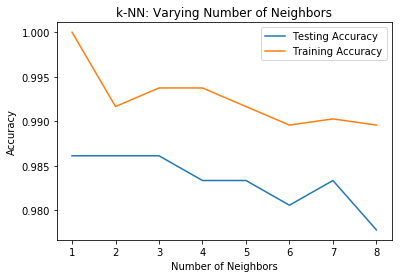

In [18]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.91      0.93        35
           9       1.00      0.94      0.97        36

   micro avg       0.98      0.98      0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## Method 2. Linear SVM

In [20]:
# Creating our linear SVM object
from sklearn.svm import SVC
from sklearn import datasets, svm, metrics
svm=SVC(C=1,kernel="linear")

In [21]:
# Fitting the training data in the SVM object declaring before
svm.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
# Saving the predictions on the test set 
y_predict=svm.predict(X_test)

In [23]:
# Measuring the accuracy of our predictions
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_predict)
print(accuracy)

0.9777777777777777


In [24]:
#accuracy_score
from sklearn.metrics import accuracy_score
svm_accuracy_score=round(accuracy_score(y_test, y_pred),2)
print('Accuracy:', svm_accuracy_score)

#precision_score
from sklearn.metrics import precision_score
svm_precision_score=round(precision_score(y_test, y_pred, average='weighted'),2)
print("Precision Score :",svm_precision_score)

#recall_score
from sklearn.metrics import recall_score
svm_recall_score=round(recall_score(y_test, y_pred, average='weighted'),2)
print("Recall Score :",svm_recall_score)

Accuracy: 0.98
Precision Score : 0.98
Recall Score : 0.98


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  1 31  0]
 [ 0  0  0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.89      0.91        35
           9       0.95      1.00      0.97        36

   micro avg       0.98      0.98      0.98       360
   macro avg       

## Method 3. Gaussian Kernal SVM

To use Gaussian kernel, you have to specify 'rbf' as value for the Kernel parameter of the SVC class.

In [26]:
from sklearn.svm import SVC
gsvm = SVC(kernel='rbf')
gsvm.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
#Prediction and Evaluation
y_pred = gsvm.predict(X_test)

In [28]:
#accuracy_score
from sklearn.metrics import accuracy_score
gsvm_accuracy_score = round(accuracy_score(y_test, y_pred),2)
print('Accuracy :', gsvm_accuracy_score)

#precision_score
from sklearn.metrics import precision_score
gsvm_precision_score= round(precision_score(y_test, y_pred, average='weighted'),2)
print("Precision Score : ",gsvm_precision_score)

#recall_score
from sklearn.metrics import recall_score
gsvm_recall_score= round(recall_score(y_test, y_pred, average='weighted'),2)
print("Recall Score : ",gsvm_recall_score)

Accuracy : 0.64
Precision Score :  0.92
Recall Score :  0.64


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  0  0  0  0 15  0  0  0  0]
 [ 0 22  0  0  0 14  0  0  0  0]
 [ 0  0 22  0  0 13  0  0  0  0]
 [ 0  0  0 32  0  5  0  0  0  0]
 [ 0  0  0  0 20 16  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0 11 25  0  0  0]
 [ 0  0  0  0  0 18  0 18  0  0]
 [ 0  0  0  0  0 28  0  0  7  0]
 [ 0  0  0  0  0  8  0  0  0 28]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        36
           1       1.00      0.61      0.76        36
           2       1.00      0.63      0.77        35
           3       1.00      0.86      0.93        37
           4       1.00      0.56      0.71        36
           5       0.22      1.00      0.37        37
           6       1.00      0.69      0.82        36
           7       1.00      0.50      0.67        36
           8       1.00      0.20      0.33        35
           9       1.00      0.78      0.88        36

   micro avg       0.64      0.64      0.64       360
   macro avg       

## Method 4. Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

In [31]:
#accuracy_score
from sklearn.metrics import accuracy_score
nb_accuracy_score =round(accuracy_score(y_test, y_pred),2)
print('Accuracy :', nb_accuracy_score)

#precision_score
from sklearn.metrics import precision_score
nb_precision_score=round(precision_score(y_test, y_pred, average='weighted'),2)
print("Precision Score : ",nb_precision_score)

#recall_score
from sklearn.metrics import recall_score
nb_recall_score=round(recall_score(y_test, y_pred, average='weighted'),2)
print("Recall Score : ",nb_recall_score)

Accuracy : 0.89
Precision Score :  0.89
Recall Score :  0.89


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35  0  0  0  1  0  0  0  0  0]
 [ 0 23  5  0  0  1  1  0  2  4]
 [ 0  1 33  0  0  0  0  0  1  0]
 [ 0  0  1 36  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  1 31  0  0  0  5]
 [ 0  1  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  6  0  0  0  0  0  1 28  0]
 [ 0  1  0  1  0  0  0  3  3 28]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.72      0.64      0.68        36
           2       0.85      0.94      0.89        35
           3       0.97      0.97      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      0.84      0.90        37
           6       0.97      0.94      0.96        36
           7       0.90      1.00      0.95        36
           8       0.80      0.80      0.80        35
           9       0.76      0.78      0.77        36

   micro avg       0.89      0.89      0.89       360
   macro avg       

## Method 5. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier()
dtree.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
dtree.score(X_test , y_test)

0.8166666666666667

In [35]:
#Prediction and Evaluation
y_pred = dtree.predict(X_test)

In [36]:
y_test.shape

(360,)

In [37]:
y_pred.shape

(360,)

In [38]:
#accuracy_score
from sklearn.metrics import accuracy_score
dtree_accuracy_score =round(accuracy_score(y_test, y_pred),2)
print('Accuracy :', dtree_accuracy_score)

#precision_score
from sklearn.metrics import precision_score
dtree_precision_score=round(precision_score(y_test, y_pred, average='weighted'),2)
print("Precision Score : ",dtree_precision_score)

#recall_score
from sklearn.metrics import recall_score
dtree_recall_score=round(recall_score(y_test, y_pred, average='weighted'),2)
print("Recall Score : ",dtree_recall_score)

Accuracy : 0.82
Precision Score :  0.82
Recall Score :  0.82


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35  0  0  0  0  0  0  0  1  0]
 [ 0 25  2  2  0  0  3  1  3  0]
 [ 1  0 28  2  0  0  0  0  4  0]
 [ 0  0  1 32  0  1  0  0  1  2]
 [ 1  1  0  0 31  0  2  0  1  0]
 [ 0  0  0  0  1 35  0  0  0  1]
 [ 0  2  0  0  0  2 31  0  1  0]
 [ 0  1  0  2  2  1  1 29  0  0]
 [ 0  5  0  1  0  2  2  2 21  2]
 [ 0  1  0  2  0  2  0  3  1 27]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.71      0.69      0.70        36
           2       0.90      0.80      0.85        35
           3       0.78      0.86      0.82        37
           4       0.91      0.86      0.89        36
           5       0.81      0.95      0.88        37
           6       0.79      0.86      0.83        36
           7       0.83      0.81      0.82        36
           8       0.64      0.60      0.62        35
           9       0.84      0.75      0.79        36

   micro avg       0.82      0.82      0.82       360
   macro avg       

## Method 6. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [41]:
rf.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
rf.score(X_test, y_test)

0.9361111111111111

In [43]:
y_pred= rf.predict(X_train)

In [44]:
accuracy_score(y_train,rf.predict(X_train))

0.9986082115518441

In [45]:
#accuracy_score
from sklearn.metrics import accuracy_score
rf_accuracy_score =round(accuracy_score(y_train, y_pred),2)
print('Accuracy :', rf_accuracy_score)


Accuracy : 1.0


In [46]:
#precision_score
from sklearn.metrics import precision_score
# rf_precision_score=precision_score(y_train, y_pred)
rf_precision_score = round(accuracy_score(y_train, y_pred),2)
print("Precision Score : ",rf_precision_score)

Precision Score :  1.0


In [47]:
# #recall_score
from sklearn.metrics import recall_score
rf_recall_score= round(recall_score(y_train, y_pred, average='weighted'),2)
print("Recall Score : ",rf_recall_score)

Recall Score :  1.0


## Method 7. Voting Classifier

In [48]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [49]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=10)
clf2 = RandomForestClassifier(n_estimators=50, random_state=10)
clf3 = GaussianNB()

In [50]:
voting = VotingClassifier(estimators=[('dtree', dtree), ('rf', rf), ('nb', nb)], voting='soft')

In [51]:
voting = voting.fit(X_train, y_train)

In [52]:
voting.score(X_test, y_test)

0.9416666666666667

In [53]:
#Prediction and Evaluation
y_pred = dtree.predict(X_test)

In [54]:
#accuracy_score
from sklearn.metrics import accuracy_score
voting_accuracy_score = round(accuracy_score(y_test, y_pred),2)
print('Accuracy :', voting_accuracy_score)

#precision_score
from sklearn.metrics import precision_score
voting_precision_score= round(precision_score(y_test, y_pred, average='weighted'),2)
print("Precision Score : ",voting_precision_score)

#recall_score
from sklearn.metrics import recall_score
voting_recall_score= round(recall_score(y_test, y_pred, average='weighted'),2)
print("Recall Score : ",voting_recall_score)

Accuracy : 0.82
Precision Score :  0.82
Recall Score :  0.82


## Method 8. Bagging

In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [56]:
lr = LogisticRegression();
# bnb = BernoulliNB()
gnb = GaussianNB()

base_methods=[gnb]
for bm  in base_methods:
 print("Method: ", bm)
 bag_model=BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True)
 bag_model=bag_model.fit(X_train,y_train)
 y_test_pred=bag_model.predict(X_test)
 print(bag_model.score(X_test, y_test))
 print(confusion_matrix(y_test, y_test_pred))

Method:  GaussianNB(priors=None, var_smoothing=1e-09)
0.8305555555555556
[[33  0  0  0  2  1  0  0  0  0]
 [ 0 27  1  0  0  0  3  0  2  3]
 [ 0  2 22  0  0  0  0  0 11  0]
 [ 0  0  1 30  0  0  0  0  5  1]
 [ 0  1  0  0 29  0  1  4  1  0]
 [ 0  0  0  1  0 35  0  1  0  0]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  4  0  1  0  0  0  1 29  0]
 [ 0  4  1  0  0  0  0  4  3 24]]


In [57]:
# performing predictions on the test dataset 
y_pred = bag_model.predict(X_test) 

In [58]:
# metrics are used to find accuracy or error 
from sklearn import metrics
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8305555555555556


In [59]:
lr = LogisticRegression();
# bnb = BernoulliNB()
gnb = GaussianNB()

base_methods=[gnb]
for bm  in base_methods:
    print("Method: ", bm)
    bag_model=BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True)
    bag_model=bag_model.fit(X_train,y_train)
    y_test_pred=bag_model.predict(X_test)
    print(bag_model.score(X_test, y_test))
    print(confusion_matrix(y_test, y_test_pred))

Method:  GaussianNB(priors=None, var_smoothing=1e-09)
0.8361111111111111
[[33  0  0  0  2  1  0  0  0  0]
 [ 0 28  1  0  0  0  1  0  3  3]
 [ 0  2 22  0  0  0  0  0 11  0]
 [ 0  0  1 30  0  0  0  0  5  1]
 [ 0  1  0  0 29  0  1  4  1  0]
 [ 0  0  0  1  0 36  0  0  0  0]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  4  0  1  0  0  0  1 29  0]
 [ 0  4  1  0  0  0  0  4  3 24]]


In [60]:
lr = LogisticRegression();
# bnb = BernoulliNB()
gnb = GaussianNB()

base_methods=[gnb]
bag_model=BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)
y_test_pred=bag_model.predict(X_test)


In [61]:
#accuracy_score
from sklearn.metrics import accuracy_score
bagging_accuracy_score =round(accuracy_score(y_test, y_pred),2)
print('Accuracy :', bagging_accuracy_score)

#precision_score
from sklearn.metrics import precision_score
bagging_precision_score=round(precision_score(y_test, y_pred, average='weighted'),2)
print("Precision Score : ",bagging_precision_score)

#recall_score
from sklearn.metrics import recall_score
bagging_recall_score=round(recall_score(y_test, y_pred, average='weighted'),2)
print("Recall Score : ",bagging_recall_score)

Accuracy : 0.83
Precision Score :  0.85
Recall Score :  0.83


In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  0  0  0  2  1  0  0  0  0]
 [ 0 27  1  0  0  0  3  0  2  3]
 [ 0  2 22  0  0  0  0  0 11  0]
 [ 0  0  1 30  0  0  0  0  5  1]
 [ 0  1  0  0 29  0  1  4  1  0]
 [ 0  0  0  1  0 35  0  1  0  0]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  4  0  1  0  0  0  1 29  0]
 [ 0  4  1  0  0  0  0  4  3 24]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.69      0.75      0.72        36
           2       0.88      0.63      0.73        35
           3       0.94      0.81      0.87        37
           4       0.94      0.81      0.87        36
           5       0.95      0.95      0.95        37
           6       0.90      0.97      0.93        36
           7       0.78      0.97      0.86        36
           8       0.57      0.83      0.67        35
           9       0.86      0.67      0.75        36

   micro avg       0.83      0.83      0.83       360
   macro avg       

## Step 3: Accuracy Results Table (<mark>8 points</mark>)

In [63]:
from IPython.display import HTML, display

In [64]:
data = [["", "KNN", "L_SVM", "RBF_SVM", "NB","DT","RF","Voting","Bagging" ],
        ["Accuracy",knn_accuracy_score,svm_accuracy_score, gsvm_accuracy_score, nb_accuracy_score,dtree_accuracy_score,rf_accuracy_score,voting_accuracy_score,bagging_accuracy_score],
        ["Weighted Precision",knn_precision_score, svm_precision_score, gsvm_precision_score, nb_precision_score,dtree_precision_score,rf_precision_score,voting_precision_score,bagging_precision_score],
        ["Weighted Recall",knn_recall_score, svm_recall_score, gsvm_recall_score, nb_recall_score,dtree_recall_score,rf_recall_score,voting_recall_score,bagging_recall_score]
        ]
display(HTML('<center><h4>load_digits Database</h4><table><tr>{}</tr></table></center>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) 
           for row in data)
       )
))

,KNN,L_SVM,RBF_SVM,NB,DT,RF,Voting,Bagging
Accuracy,0.98,0.98,0.64,0.89,0.82,1.0,0.82,0.83
Weighted Precision,0.98,0.98,0.92,0.89,0.82,1.0,0.82,0.85
Weighted Recall,0.98,0.98,0.64,0.89,0.82,1.0,0.82,0.83


## Step 4: Conclusion (<mark>2 Points</mark>)

<p> I have loaded the digits database and then calculated the accuracy Weighted, Precsion and Weighted Recall values  </p>
<p>Based on the results, I have understand the Random Forest Algorithm is the best one from all alogirthm.  </p>

<p>Confusion matrix and classification report are another tool to visualize the model performance.   </p>

Best Accuracy Algorithms from hight accuracy values to low accuracy values list as follow
<ol>
    <li>Random Forest Algorithm</li>
    <li>KNN and Linear SVM</li>
    <li>NB</li>
    <li>Bagging</li>
    <li>Dession Tree and votting</li>
    <li>RBF SVM </li>
</ol>